## 0. Описание задачи
### Предсказывание дождя на следующий день по признакам. Если выпало 1 мм или более осадков, то да, иначе нет. // TODO
## 1. Чтение данных

In [162]:
from datetime import timedelta
import sklearn                  # Алгоритмы машинного обучения
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt  # Научная графика
%matplotlib inline
# Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне


In [163]:
path = "../dataset/weatherAUS.csv"
data_raw = pd.read_csv(path)
data_raw['RainToday'] = data_raw['RainToday'].apply(
    lambda v: None if type(v) == float else v == "Yes")
data_raw['RainTomorrow'] = data_raw['RainTomorrow'].apply(
    lambda v: None if type(v) == float else v == "Yes")


In [164]:
data_raw.shape

(145460, 23)

In [165]:
data_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False


Cтолбцы (признаки) имеют имена:

- `Date` - дата наблюдения
- `Location` - общепринятое название местоположения метеостанции
- `MinTemp` - минимальная температура в градусах Цельсия
- `MaxTemp` - максимальная температура в градусах Цельсия
- `Rainfall` - количество осадков, зафиксированных за день в мм
- `Evaporation` - испарение за 24 часа до 9:00
- `Sunshine` - количество часов яркого солнечного света в день
- `WindGustDir` - направление сильнейшего порыва ветра за 24 часа до полуночи
- `WindGustSpeed` - скорость (км/ч) самого сильного порыва ветра за 24 часа до полуночи
- `WindDir9am` - направление ветра в 9:00
- `WindDir3pm` - направление ветра в 15:00
- `WindSpeed9am` - средняя скорость ветра (км/ч) за 10 минут до 9:00
- `WindSpeed3pm` - средняя скорость ветра (км/ч) за 10 минут до 15:00
- `Humidity9am` - влажность (в процентах) в 9:00
- `Humidity3pm` - влажность (в процентах) в 15:00
- `Pressure9am` - атмосферное давление (гПа) относительно уровня моря в 9:00
- `Pressure3pm` - атмосферное давление (гПа) относительно уровня моря в 15:00
- `Cloud9am` - часть неба, закрытая облаками в 9:00. Это измеряется в октах, которые составляют восьмые доли. Она фиксирует, сколько восьмых частей неба закрыто облаками. Значение 0 указывает на полностью ясное небо, а значение 8 указывает на то, что оно полностью пасмурно.
- `Cloud3pm` - часть неба, закрытая облаками (в "октах", восьмые доли) в 15:00. Описание в `Cloud9am`
- `Temp9am` - температура (градусы цельсия) в 9:00
- `Temp3pm` - температура (градусы цельсия) в 15:00
- `RainToday` - логическое значение: 1, если количество осадков (мм) за 24 часа до 9 утра превышает 1 мм, в противном случае 0
- `RainTomorrow` - логическое значение: 1, если количество осадков (мм) за 24 часа следующего дня превышает 1 мм, в противном случае 0

Признаки `RainToday`, `RainTomorrow` - бинарные, `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm` - номинальные (категориальные), остальные признаки - количественный (числовой).
Заменим типы категориальных признаков с 'object' на специальный предназначенный для хранения категориальных значений:

In [166]:
data_raw['Date'] = pd.to_datetime(data_raw['Date'])
data_raw['Date'].dtype


dtype('<M8[ns]')

In [167]:
data_raw['Location'] = data_raw['Location'].astype('category')
data_raw['Location'].dtype

CategoricalDtype(categories=['Adelaide', 'Albany', 'Albury', 'AliceSprings',
                  'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns',
                  'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin',
                  'GoldCoast', 'Hobart', 'Katherine', 'Launceston',
                  'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree',
                  'MountGambier', 'MountGinini', 'Newcastle', 'Nhil',
                  'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
                  'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond',
                  'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport',
                  'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga',
                  'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe',
                  'Wollongong', 'Woomera'],
, ordered=False)

In [168]:
data_raw['WindGustDir'] = data_raw['WindGustDir'].astype('category')
data_raw['WindGustDir'].dtype


CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [169]:
data_raw['WindDir9am'] = data_raw['WindDir9am'].astype('category')
data_raw['WindDir9am'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

In [170]:
data_raw['WindDir3pm'] = data_raw['WindDir3pm'].astype('category')
data_raw['WindDir3pm'].dtype

CategoricalDtype(categories=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
                  'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
, ordered=False)

## 2. Визуалиция данных и вычисление основных характеристик

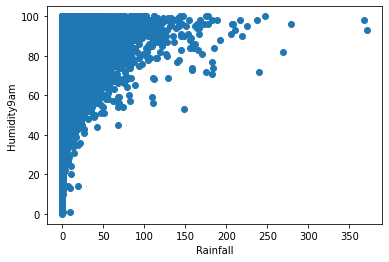

In [171]:
plt.scatter(data_raw['Rainfall'], data_raw['Humidity9am'], alpha=1)
plt.xlabel('Rainfall')
plt.ylabel('Humidity9am')
pass


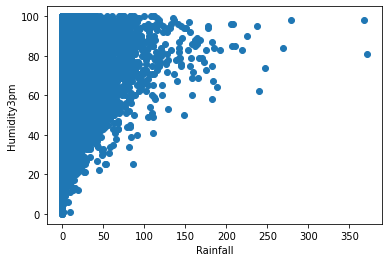

In [172]:
plt.scatter(data_raw['Rainfall'], data_raw['Humidity3pm'], alpha=1)
plt.xlabel('Rainfall')
plt.ylabel('Humidity3pm')
pass


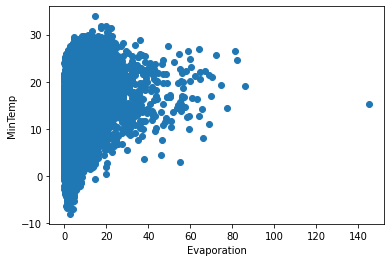

In [173]:
plt.scatter(data_raw['Evaporation'], data_raw['MinTemp'], alpha=1)
plt.xlabel('Evaporation')
plt.ylabel('MinTemp')
pass


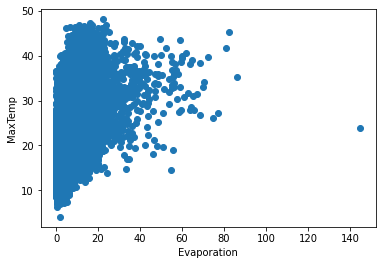

In [174]:
plt.scatter(data_raw['Evaporation'], data_raw['MaxTemp'], alpha=1)
plt.xlabel('Evaporation')
plt.ylabel('MaxTemp')
pass


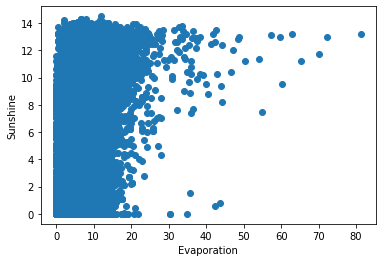

In [175]:
plt.scatter(data_raw['Evaporation'], data_raw['Sunshine'], alpha=1)
plt.xlabel('Evaporation')
plt.ylabel('Sunshine')
pass


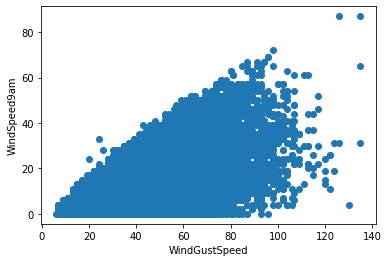

In [176]:
plt.scatter(data_raw['WindGustSpeed'], data_raw['WindSpeed9am'], alpha=1)
plt.xlabel('WindGustSpeed')
plt.ylabel('WindSpeed9am')
pass


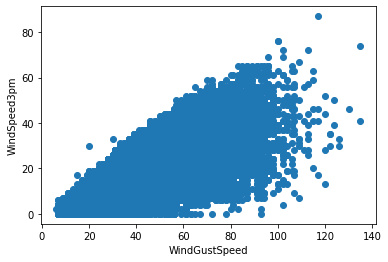

In [177]:
plt.scatter(data_raw['WindGustSpeed'], data_raw['WindSpeed3pm'], alpha=1)
plt.xlabel('WindGustSpeed')
plt.ylabel('WindSpeed3pm')
pass


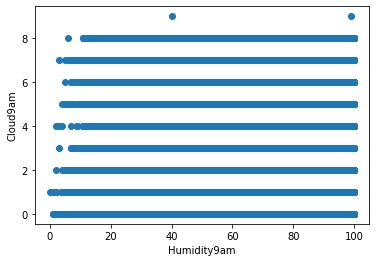

In [178]:
plt.scatter(data_raw['Humidity9am'], data_raw['Cloud9am'], alpha=1)
plt.xlabel('Humidity9am')
plt.ylabel('Cloud9am')
pass


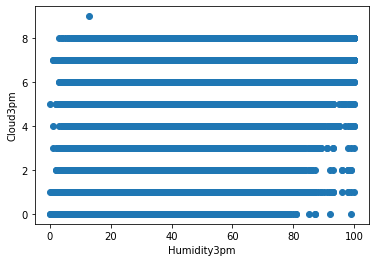

In [179]:
plt.scatter(data_raw['Humidity3pm'], data_raw['Cloud3pm'], alpha=1)
plt.xlabel('Humidity3pm')
plt.ylabel('Cloud3pm')
pass


Из графиков видно, что призанки `Cloud3pm` и `Cloud9am` принимают значение от 0 до 9. Значение равное 9 это выброс (значение этих признаков изменяются от 0 до 8). У признаков `Rainfall`, `Evaporation` и `WindGustSpeed` есть значения, которые сильно отличаются от признаков основной массы объектов.
Для обнаружения выборосов рассмотрим квантили для этих признаков.

In [180]:
data_raw['Cloud9am'].quantile([.1,.5,.10,.50,.70, .90, .95, 1])

0.10    1.0
0.50    5.0
0.10    1.0
0.50    5.0
0.70    7.0
0.90    8.0
0.95    8.0
1.00    9.0
Name: Cloud9am, dtype: float64

Для признака `Cloud9am` уберем все значения, которые превышают значения квантиля равное 0.9. Для признака `Cloud3pm` аналогично

In [181]:
data_raw['Rainfall'].quantile([.05, .1, .5, .9, .95, .99, .995,.998,.999, 1])


0.050      0.0
0.100      0.0
0.500      0.0
0.900      6.2
0.950     13.0
0.990     37.4
0.995     53.0
0.998     79.2
0.999    102.0
1.000    371.0
Name: Rainfall, dtype: float64

Для признака `Rainfall` уберем все значения, значений квантиля которых равно 1

In [182]:
data_raw['Evaporation'].quantile([.05, .1, .5, .9, .95, .99, .995, .998, .999, 1])


0.050      1.0000
0.100      1.4000
0.500      4.8000
0.900     10.2000
0.950     12.0000
0.990     18.4000
0.995     23.0000
0.998     33.5324
0.999     42.4662
1.000    145.0000
Name: Evaporation, dtype: float64

In [183]:
data_raw['WindGustSpeed'].quantile(
    [.05, .1, .5, .9, .95, .99, .995, .998, .999, 1])


0.050     20.0
0.100     24.0
0.500     39.0
0.900     57.0
0.950     65.0
0.990     81.0
0.995     87.0
0.998     94.0
0.999    100.0
1.000    135.0
Name: WindGustSpeed, dtype: float64

Соответсвенно для признаков `Evaporation` и `WindGustSpeed` аналогично как и для `Rainfall`

In [184]:
rows_to_drop = data_raw[
    (data_raw['Cloud9am'] == data_raw['Cloud9am'].quantile(1)) | (data_raw['Cloud3pm'] == data_raw['Cloud3pm'].quantile(1)) | (data_raw['Rainfall'] == data_raw['Rainfall'].quantile(1)) | (data_raw['Evaporation'] == data_raw['Evaporation'].quantile(1)) | (data_raw['WindGustSpeed'] == data_raw['WindGustSpeed'].quantile(1))].index
data = data_raw.drop(rows_to_drop)
data.shape

(145452, 23)

In [185]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143967.000000,144191.000000,142192.000000,82666.000000,75619.000000,135192.000000,143686.000000,142391.000000,142798.000000,140946.000000,130387.000000,130425.000000,89565.000000,86097.000000,143685.000000,141844.000000
mean,12.193874,23.221291,2.357533,5.466379,7.611286,40.033205,14.042328,18.661980,68.880538,51.538781,1017.650211,1015.255973,4.447228,4.509890,16.990571,21.683429
std,6.398455,7.119083,8.418952,4.165525,3.785499,13.599931,8.912194,8.808373,19.029019,20.795380,7.106203,7.037308,2.887113,2.720336,6.488743,6.936759
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,367.600000,86.200000,14.500000,130.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,8.000000,8.000000,40.200000,46.700000


In [186]:
data.describe(include=['category'])


,Location,WindGustDir,WindDir9am,WindDir3pm
count,145452,135129,134887,141225
unique,49,16,16,16
top,Canberra,W,N,SE
freq,3435,9915,11758,10838


Матрица корреляции для количественных признаков:

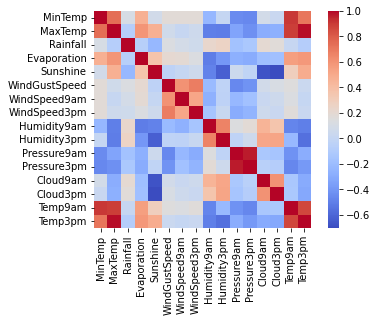

In [187]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass


## 3. Обработка пропущенных значений

In [188]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3260
Evaporation      62786
Sunshine         69833
WindGustDir      10323
WindGustSpeed    10260
WindDir9am       10565
WindDir3pm        4227
WindSpeed9am      1766
WindSpeed3pm      3061
Humidity9am       2654
Humidity3pm       4506
Pressure9am      15065
Pressure3pm      15027
Cloud9am         55887
Cloud3pm         59355
Temp9am           1767
Temp3pm           3608
RainToday         3260
RainTomorrow      3267
dtype: int64

Пропущенныные значения для каждой количественной переменной заполняем их средним или медианным значением. Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [189]:
columns = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]
data.fillna(data[columns].median(axis=0), axis=0, inplace=True)


In [190]:
data.isna().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10323
WindGustSpeed        0
WindDir9am       10565
WindDir3pm        4227
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3260
RainTomorrow      3267
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [191]:
data['WindGustDir'].fillna(data['WindGustDir'].mode().iloc[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode().iloc[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode().iloc[0], inplace=True)


In [192]:
data.isna().sum()


Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3260
RainTomorrow     3267
dtype: int64

Удалим строки в которых признак `RainTomorrow` и `RainToday` имеет пропущенное значение. // TODO

In [193]:
data.dropna(axis=0, how='all', subset=['RainTomorrow'], inplace=True)
data.dropna(axis=0, how='all', subset=['RainToday'], inplace=True)


In [194]:
data['RainTomorrow'] = data['RainTomorrow'].astype('float32')
data['RainToday'] = data['RainToday'].astype('float32')
data.isna().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [195]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000,140780.000000
mean,12.184124,23.233716,2.346555,5.186280,7.995678,39.906500,13.982320,18.637243,68.839274,51.462907,1017.649404,1015.252306,4.643671,4.698764,16.985739,21.682206,0.223398,0.221608
std,6.393239,7.106824,8.405374,3.174833,2.768206,13.129371,8.851028,8.717530,18.960869,20.546848,6.748943,6.682473,2.300732,2.123649,6.480913,6.873415,0.416524,0.415330
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.000000
max,33.900000,48.100000,367.600000,86.200000,14.500000,130.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,8.000000,8.000000,40.200000,46.700000,1.000000,1.000000


In [196]:
data.describe(include=['category'])


,Location,WindGustDir,WindDir9am,WindDir3pm
count,140780,140780,140780,140780
unique,49,16,16,16
top,Canberra,W,N,SE
freq,3401,18856,20925,14247


## 4. Обработка категориальных признаков

Бинаризуем категориальные признаки:

In [197]:
data = pd.get_dummies(data)
data.shape

(140780, 116)

In [198]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,...,0,1,0,0,0,0,0,0,0,0


## 5. Проведение нормализации

Выполним стандартизацию (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению) всех признаков. Для этого удалим столбец с признаком `Data`, в дальнейшем он не пригодится

In [208]:
data_stand = data.drop(['Date'], axis=1)
np.random.seed(52)
random_subset = np.random.choice(
    np.arange(data_stand.shape[0]), size=40000, replace=False)
data_stand = data_stand.iloc[random_subset]
data_stand = (data_stand - data_stand.min(axis=0)) / \
    (data_stand.max(axis=0) - data_stand.min(axis=0))


In [200]:
data_stand['RainTomorrow'].unique()

array([0., 1.])

In [201]:
data_stand['RainTomorrow'].astype('bool')
data_stand['RainToday'].astype('bool')


96108     False
12459     False
130888    False
11938     False
120189    False
          ...  
34196     False
120959    False
72771     False
136655    False
30616     False
Name: RainToday, Length: 10000, dtype: bool

Мы видим, что основная масса точек сгрудилась в левом нижнем углу. Какие-то точки соответствуют квартирам с чрезмерно большими значениями цены или площади. Например, более $2$ млрд. руб. или $5$ тыс. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантили для признаков `Price` и `Area`:

In [202]:
data_stand.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.507513,0.525437,0.015695,0.071695,0.549826,0.281526,0.202062,0.237988,0.686848,0.512435,...,0.053300,0.05950,0.063500,0.098300,0.06370,0.05840,0.066200,0.072800,0.058500,0.062700
std,0.163972,0.142572,0.054365,0.044831,0.192076,0.112535,0.126821,0.111078,0.189827,0.207064,...,0.224642,0.23657,0.243872,0.297735,0.24423,0.23451,0.248644,0.259821,0.234698,0.242435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.389744,0.416499,0.000000,0.055402,0.558621,0.205128,0.101449,0.166667,0.575758,0.363636,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.502564,0.513078,0.000000,0.066482,0.579310,0.273504,0.188406,0.243590,0.696970,0.515152,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.625641,0.627767,0.005510,0.074792,0.601724,0.333333,0.275362,0.307692,0.828283,0.646465,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


## 6. Разбиение данных на обучающие и тестовые

In [203]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [209]:
X = data_stand.drop(['RainTomorrow'], axis=1)
y = data_stand['RainTomorrow']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=52)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test


(30000, 10000)

## 7. Запустить классификатор KNN

Запустим классификатор KNN с параметром по умолчанию:

In [211]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print("Train: {}%, Test: {}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))


C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train: 85.56333333333333%, Test: 80.15%


In [217]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print("Train: {}%, Test: {}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))


C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train: 82.34666666666666%, Test: 80.71000000000001%


In [218]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print("Train: {}%, Test: {}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))


C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train: 84.07333333333334%, Test: 80.74%


In [219]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print("Train: {}%, Test: {}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))


C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train: 87.65666666666667%, Test: 79.25999999999999%


In [220]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print("Train: {}%, Test: {}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))


C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train: 86.68666666666667%, Test: 79.54%


In [222]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print("Train: {}%, Test: {}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))

C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gogov\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train: 100.0%, Test: 76.29%


## 8. Вычисление ошибки на обучающей и тестовой выборки

## 9. Запуск других классификаторов. Сравнение результатов

## 10. Борьба с несбалансированностью классов

## 11. Исключение коррелированых переменных

## 12. Выводы